# Analysis of Stroop Data #


This project is to investigate and analyse the Stroop Effect on a given sample data. The analysis will involve a statistical test which will lead to a conclusion. 
Before diving deep, please find below the details of the expriment -
>In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Now I'll try to answer the questions as stated in the project requirment.

Q1: What is our independent variable? What is our dependent variable?

>The independent variable is the type of words on which the participants were tested on, viz, congruent and incongruent words conditions. Congruent word conditon means the meaning of the words and the color of ink in which they were displayed are same. Incongruent, on the other hand means, the meaning of words and the color of ink in which they were displayed are different. The number of words were same for both the conditions, so, it can not be a variable affecting the result. The set of participants were also same for both the cases. So, considering all other factors same, we can say that the type of words is the independent variable here.

>The dependent variable is the time it takes to name the ink colors, which can be thought of as a measure of the performance of the participants in the experiment. There will be two results for each participant, one for the congruent case and the other for the incongruent case.

Q2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We expect that the result of this experiment will be different depending on whether the words were congruent or incongruent. And, we seek to find enough evidence in the data to support our claim. So, one hypotheses which I can investigate is as shown below.

Let us assume the average time taken for the congruent case is $\mu_0$ and for the incongruent case it is $\mu_1$. Then our hypotheses will be as folllows - $$\begin{align}\text{Null Hypothesis,  }H_0: \mu_0 = \mu_1 \text{or  }\mu_0 - \mu_1 = 0\\ \textrm{Alternative Hypothesis,  }H_a: \mu_0 \neq \mu_1 \text{or  }\mu_0 - \mu_1 \neq 0\end{align}$$ $$\text{In words, }H_0: \text{the population mean for the congruent case is same as the population mean for the incongruent case}$$ $$H_a: \text{the population mean for congruent case is different from the population mean for the incongruent case}$$

If we are interested in directional changes, e.g., if we want to test if the incongruent average time is significantly higher than the average time for congruent case, then we can choose the below set of hypotheses - $$\begin{align}\text{Null Hypothesis,   }H_0: \mu_0 \geq \mu_1 \text{or  } \mu_0 - \mu_1 \geq 0\\ \text{Alternative Hypothesis,   }H_a: \mu_0 \lt \mu_1 \text{or  }\mu_0 - \mu_1 \lt 0 \end{align}$$ $$H_0: \text{the population mean for the congruent case is more than or equal to the population mean for the incongruent case}$$ $$H_a: \text{the population mean for congruent case is less than the population mean for the incongruent case}$$ 

Here, $\mu_0 - \mu_1$ is one of the measure of the effect size. I'll test both the hypotheses in this analysis.

The data which we have is for a small set of participants and it'll not be reasonable to think that it is the whole population. I'll consider this data set as a sample for which we don't know the actual mean and standard deviation. So, I'll use a __dependent t-test__ with $\alpha=.05$ to draw statistical inferences. It is dependent because here the subjects are taking the test twice for two different conditions and we have paired data. For the first set of hypotheses I'll use a __two-tailed__ t-test and for the second set of hypotheses I'll use a __one-tailed__ t-test in the negative direction.

Q3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Please find below the descriptive statistics for the dataset separated by word type. It contains the mean which can be regarded as a measure of central tendency. It also contains the standard deviation which can be thought of as a measure of variability in the sample. This standard deviation is calculated using Bessel's correction as the dataset is a sample. I used the next cell to generate the statistics using python which shows variuos other statistics about the data including quartiles. Please check the output of the next cell. 

In [1]:
# import libraries
import pandas as pd

# read the data from the given csv file
df = pd.read_csv('./stroopdata.csv')

print(df.shape)
df.describe()

(24, 2)


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [2]:
# we need to calculate the statistics of the differences for the hypothesis test
df['Difference'] = df['Congruent'] - df['Incongruent']
df['Difference'].describe()

count    24.000000
mean     -7.964792
std       4.864827
min     -21.919000
25%     -10.258500
50%      -7.666500
75%      -3.645500
max      -1.950000
Name: Difference, dtype: float64

Q4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

I used the next few cells to generate histogram charts for the dataset, one for the congruent case and another for the incongruent case. Both the plots look similar with high values in the middle and gradual smaller values on both sides. This indicates a normal distribution of the data but we can't be very sure of this as this is a small sample. Also, the distribution is a bit right shifted for the incongruent case due to its higher mean.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histogram(data, title = 'Distribution of data'):
    plt.hist(data, bins = 15, range=(0,35))
    plt.title(title)
    plt.xlabel('Duration (s)')
    plt.show()

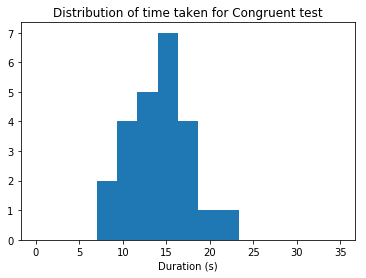

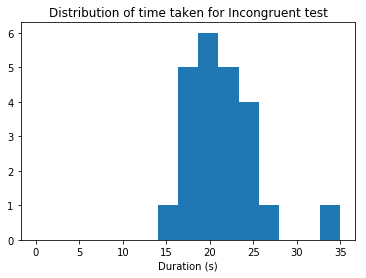

In [4]:
plot_histogram(df['Congruent'], title = 'Distribution of time taken for Congruent test')
plot_histogram(df['Incongruent'], title = 'Distribution of time taken for Incongruent test')

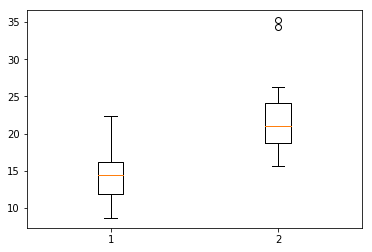

In [5]:
# Next plot the distribution of data as a box plot
plt.boxplot([df['Congruent'], df['Incongruent']])
plt.show()

Q5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

I'll perform the statistical test in two phases. In the first phase, I'll perform statistical test for the first set of hypotheses which are as follows - $$\begin{align}\text{Null Hypothesis,  }H_0: \mu_0 = \mu_1 \text{or  }\mu_0 - \mu_1 = 0\\ \textrm{Alternative Hypothesis,  }H_a: \mu_0 \neq \mu_1 \text{or  }\mu_0 - \mu_1 \neq 0\end{align}$$ This a two tailed t-test as we don't want to infer any directional effect.

> $$\text{No of data points in the sample, }n = 24$$ $$\text{Degrees of freedon, }df = n -1 = 24 - 1 = 23$$ $$t_{critical} = \pm2.069 \text{  for   } \alpha = .05 \text{ or a confidence interval of 95%}$$ $$ \text{Our point estimates are as follows,  }\mu_1 = 14.05 \text{  and  } \mu_2 = 22.01$$ $$\text{Point estimate of the difference,  }\mu_1 - \mu_2 = 14.05 - 22.02 = -7.97$$ $$\text{Standard deviation of differences (with Bessel's correction), }SD = 4.865$$ $$\text{Standard error of the mean, }SE = SD/\sqrt(n) = 4.865/\sqrt(24) = 0.993$$ $$t= (\mu_1-\mu_2)/SE = -7.97/.993 = -8.03$$ $$\text{As } t < t_{critical}\text{, we reject the null hypothesis.}$$ $$\text{Cohen's }d = - 7.97/4.865 = - 1.64$$ $$\text{95% Confidence interval of the mean difference, }CI = -7.97\pm t_{critical}*SE $$ $$= -7.97 \pm 2.069*0.993 = [-10.02, -5.91]$$ 

So, we conclude that the data provide enough evidence to reject the null hypothesis. In other words, we conclude that the time taken in incongruent case is significantly different from that of congruent case.

Next, I'll perform statistical test for the second set of hypotheses. This is a one-tailed t-test in the negative direction - $$\begin{align}\text{Null Hypothesis,   }H_0: \mu_0 \geq \mu_1 \text{or  } \mu_0 - \mu_1 \geq 0\\ \text{Alternative Hypothesis,   }H_a: \mu_0 \lt \mu_1 \text{or  }\mu_0 - \mu_1 \lt 0 \end{align}$$

>$$\text{Everything else will be same as above except, for one tailed t-test in the negative direction, }$$ $$t_{critical} = -1.714 \text{  for   } \alpha = .05 \text{ or confidence interval of 95%.}$$ $$\text{As before, }t = −8.03 \text{ and } t < t_{critical}\text{  and we reject the null hypothesis.}$$

So, we conclude that the time taken in congruent case is significantly less than that of incongruent case. Both of the above conclusions match up the expectation.

Q6: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

There are a lot of theories which are used to explain Stroop Effect. Some of them are as follows - 

Processing speed:
This suggests that word processing is significantly faster than color processing in our brain. So, when there is a conflict regarding words and colors, if the task is to report the color, the word information arrives at the decision-making stage before the color information which presents processing confusion leading to more time to complete the task.

Selective attention:
The selective attention theory suggests that the brain needs to use more attention to recognize a color than to word encoding, so it takes a little longer.

Automaticity:
This theory suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading. This idea is based on the premise that automatic reading does not need controlled attention, but still uses enough attentional resources to reduce the amount of attention accessible for color information processing.

Parallel distributed processing:
This theory suggests that as the brain analyzes information, different and specific pathways are developed for different tasks. Some pathways, such as reading, are stronger than others, and automaticity is a function of the strength of each pathway. So, when two pathways are activated simultaneously in the Stroop effect, interference occurs between the stronger (word reading) path and the weaker (color naming) path. So, the response from weaker pathway will take longer.


There are a lot of alternative ways in which Stroop Task can be performed and they all lead to similar results. Some of the alternatives are as follows -

We can include a neutral condition where only text in black or only patches of color without any word can be shown to the participants.

We can include a warped words condition. As in normal Stroop test word's color is different from the ink color of the word; however, here the words are printed in such a way that it is more difficult to read (typically curved-shaped).

There are other tests simliar Stroop test - using negative emotional words mixed with more neutral words, digits with different sizes where conflict will be there between physical size of the digit and meaning of the digit. 

References: Wikipedia page for [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect) 